# Customer Satisfaction Prediction Data Cleaning and EDA

# Data Cleaning

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
data = pd.read_csv(r"F:\Vaishnavi\practiced\vs code\Unified Mentor\Customer Satisfaction Prediction\customer_support_tickets.csv")
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [49]:
column_to_drop = ['Ticket ID','Customer Name','Customer Email','Customer Age','Ticket Description','Resolution']
company_base_data = data.drop(columns=column_to_drop)

In [50]:
company_base_data.shape

(8469, 11)

In [51]:
# check missing value
company_base_data.isnull().sum()

Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Status                      0
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [52]:
# target column with missing value can not be used so drop missing value

company_base_data = company_base_data.dropna(subset=["Customer Satisfaction Rating"])
company_base_data.isnull().sum()

Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Status                   0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

In [53]:
# check for duplicate(no duplicates in this data)
company_base_data.duplicated().sum()

np.int64(0)

zero duplicates

In [54]:
# chack if all fetures have proper datatypes
company_base_data.dtypes

Customer Gender                  object
Product Purchased                object
Date of Purchase                 object
Ticket Type                      object
Ticket Subject                   object
Ticket Status                    object
Ticket Priority                  object
Ticket Channel                   object
First Response Time              object
Time to Resolution               object
Customer Satisfaction Rating    float64
dtype: object

In [55]:
company_base_data['Date of Purchase'] = pd.to_datetime(company_base_data['Date of Purchase'], errors='coerce')
company_base_data['First Response Time'] = pd.to_datetime(company_base_data['First Response Time'], errors='coerce')
company_base_data['Time to Resolution'] = pd.to_datetime(company_base_data['Time to Resolution'], errors='coerce')


In [56]:
categorical_cols = ['Customer Gender', 'Product Purchased', 'Ticket Type', 
                    'Ticket Subject', 'Ticket Status', 'Ticket Priority', 'Ticket Channel']

for col in categorical_cols:
    company_base_data[col] = company_base_data[col].astype('category')

# EDA

In [57]:
company_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Customer Gender               2769 non-null   category      
 1   Product Purchased             2769 non-null   category      
 2   Date of Purchase              2769 non-null   datetime64[ns]
 3   Ticket Type                   2769 non-null   category      
 4   Ticket Subject                2769 non-null   category      
 5   Ticket Status                 2769 non-null   category      
 6   Ticket Priority               2769 non-null   category      
 7   Ticket Channel                2769 non-null   category      
 8   First Response Time           2769 non-null   datetime64[ns]
 9   Time to Resolution            2769 non-null   datetime64[ns]
 10  Customer Satisfaction Rating  2769 non-null   float64       
dtypes: category(7), datetime64[ns](3), 

In [58]:
company_base_data.describe()

,Date of Purchase,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,2769,2769,2769,2769.000000
mean,2020-12-28 16:55:38.678223104,2023-06-01 11:20:49.245575936,2023-06-01 11:17:21.509931520,2.991333
min,2020-01-01 00:00:00,2023-05-31 21:55:39,2023-05-31 21:53:30,1.000000
25%,2020-06-29 00:00:00,2023-06-01 05:19:36,2023-06-01 05:34:43,2.000000
50%,2020-12-26 00:00:00,2023-06-01 11:22:02,2023-06-01 11:17:48,3.000000
75%,2021-07-01 00:00:00,2023-06-01 17:27:08,2023-06-01 17:07:32,4.000000
max,2021-12-30 00:00:00,2023-06-02 00:54:21,2023-06-02 00:55:33,5.000000
std,NaN,NaN,NaN,1.407016


Insight
- Most of the cutomers are of middle age (45) but wide range exist
- Average customer satisfaction is moderate, there is room for improvement in service quality
- Date of Purchase and Time to resolution do not align with Date of purchase which indicates potential data  inconsistancy during preprocessing

In [59]:
company_base_data.columns

Index(['Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Status', 'Ticket Priority',
       'Ticket Channel', 'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

C:\Users\User\AppData\Local\Temp\ipykernel_9844\1034879669.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer Satisfaction Rating', data=company_base_data, palette='viridis')


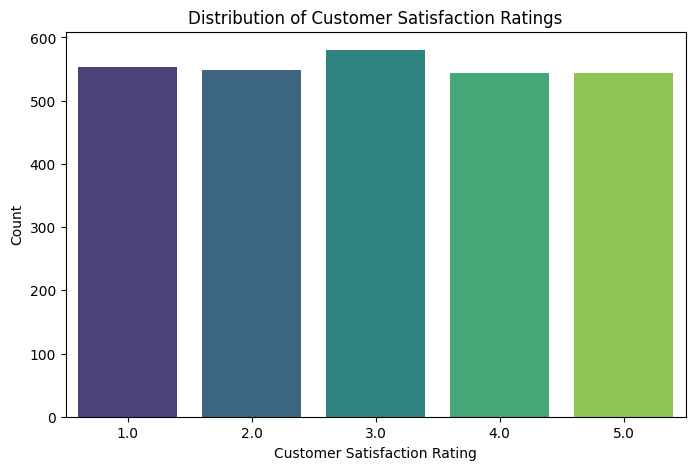

In [60]:
# plotting countplot to understand customers satisfaction

plt.figure(figsize=(8,5))
sns.countplot(x='Customer Satisfaction Rating', data=company_base_data, palette='viridis')
plt.title('Distribution of Customer Satisfaction Ratings')
plt.xlabel('Customer Satisfaction Rating')
plt.ylabel('Count')
plt.show()

- Customer satisfaction is uniformly distributed, no skews. Balanced data.
- Customer satisfaction is balanced. no extrame high or too low satisfaction

C:\Users\User\AppData\Local\Temp\ipykernel_9844\258496137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


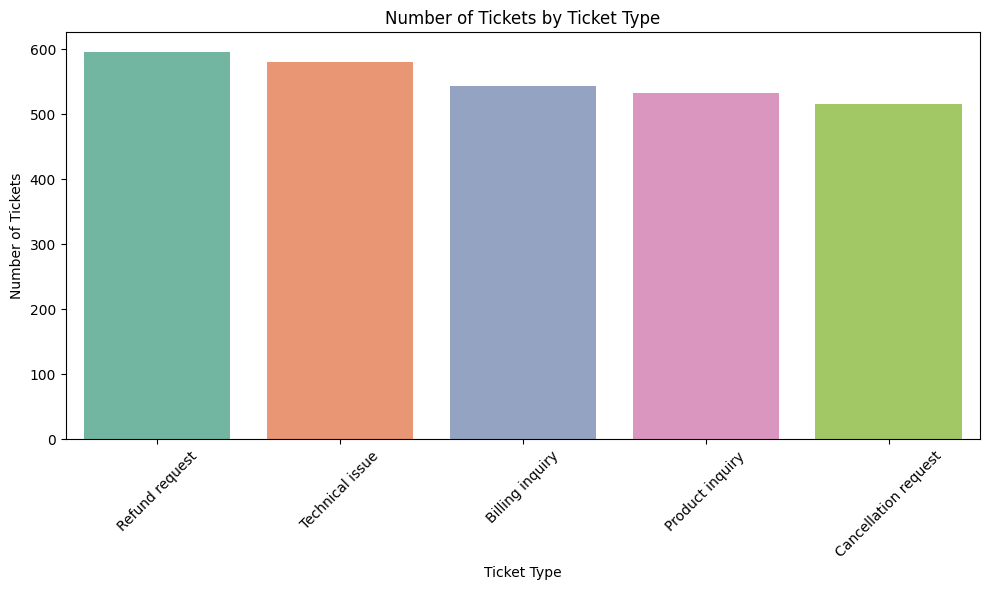

In [61]:
# Tickt count by ticket type
plt.figure(figsize=(10,6))
sns.countplot(
    data=company_base_data,
    x='Ticket Type',      # categorical axis
    order=company_base_data['Ticket Type'].value_counts().index,  # sort by count
    palette='Set2'
)

plt.xlabel('Ticket Type')
plt.ylabel('Number of Tickets')
plt.title('Number of Tickets by Ticket Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9844\3540683903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


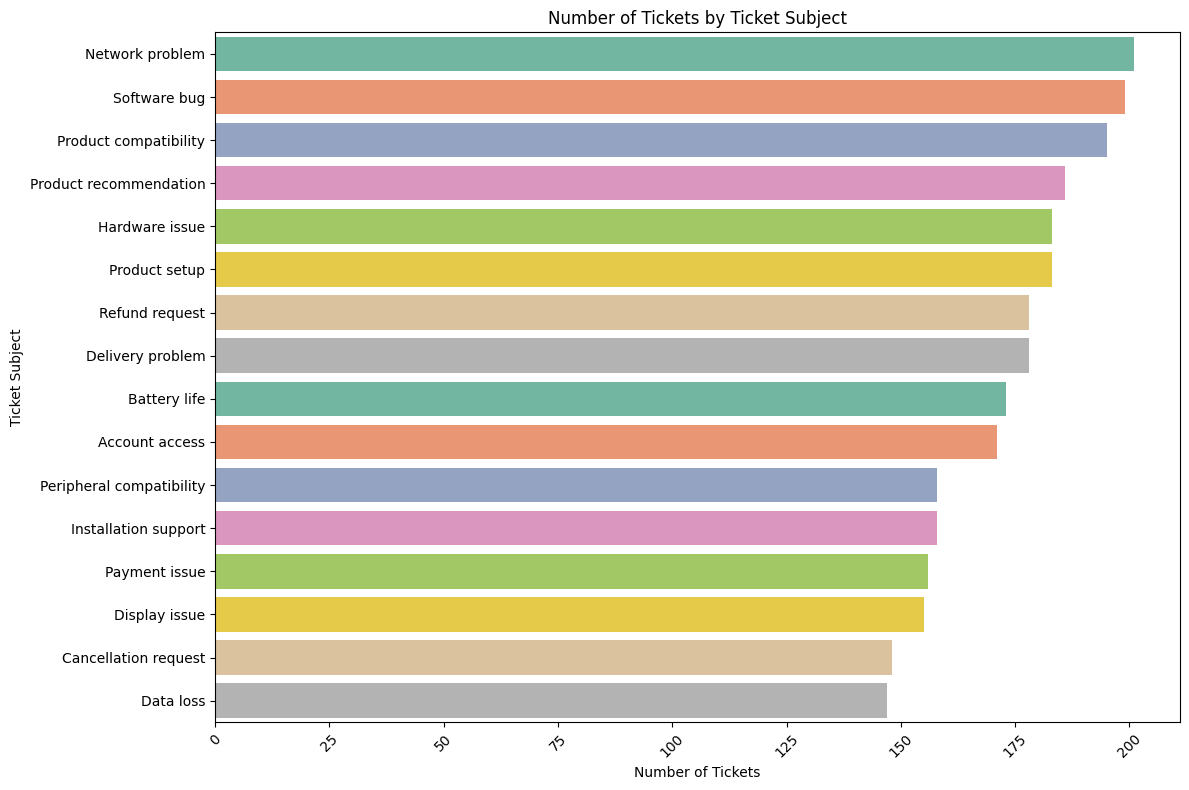

In [62]:
plt.figure(figsize=(12,8))
sns.countplot(
    data=company_base_data,
    y='Ticket Subject',      
    order=company_base_data['Ticket Subject'].value_counts().index,  # sort by count
    palette='Set2'
)

plt.xlabel('Number of Tickets')
plt.ylabel('Ticket Subject')
plt.title('Number of Tickets by Ticket Subject')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Even though the ticket count by type has no major difference, most of the tickets are for refund request.
- Need to focus on solving issues like Network problem, software bug, product compatability as these have high number of ticket counts

C:\Users\User\AppData\Local\Temp\ipykernel_9844\495519469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


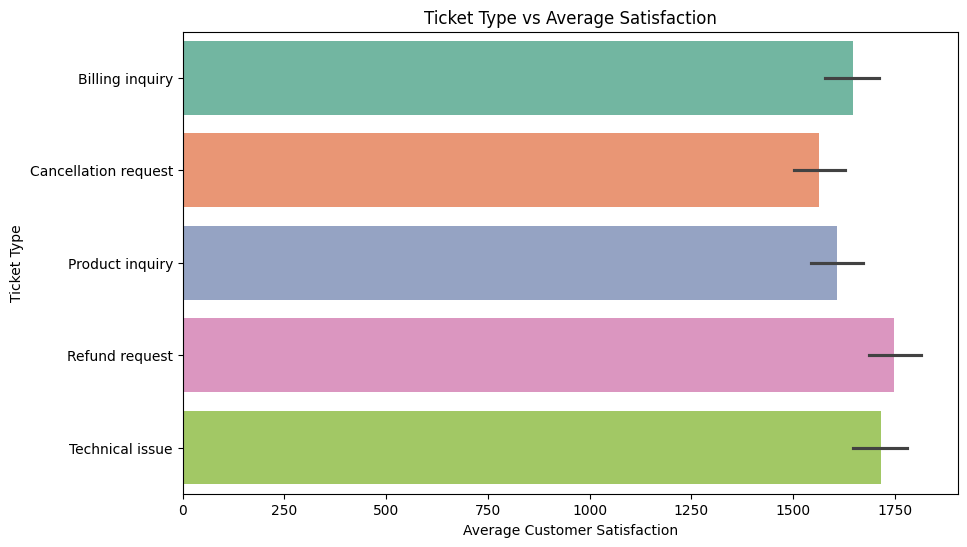

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=company_base_data,
    x='Customer Satisfaction Rating',
    y='Ticket Type',
    estimator=sum,
    palette='Set2'
)
plt.xlabel('Average Customer Satisfaction')
plt.ylabel('Ticket Type')
plt.title('Ticket Type vs Average Satisfaction')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9844\4261740880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


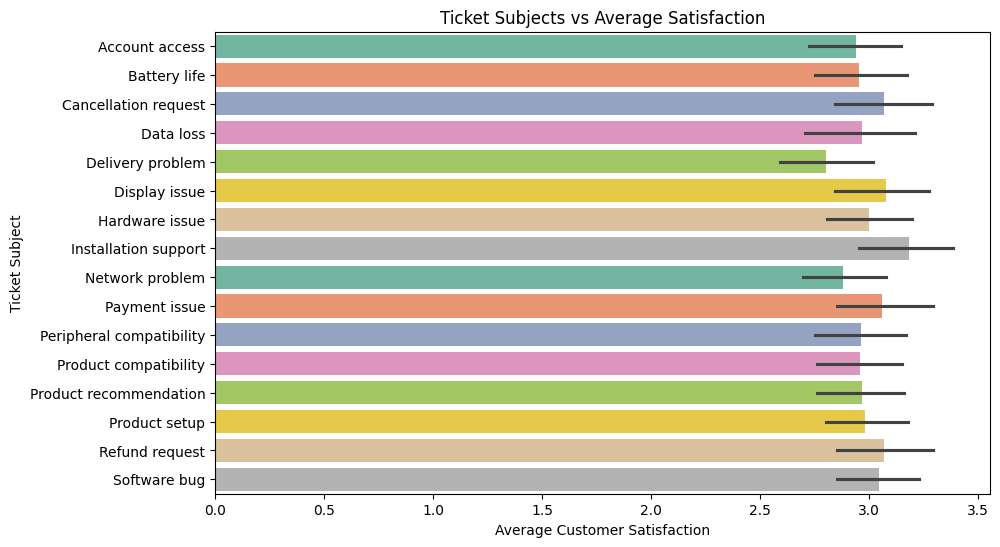

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=company_base_data,
    x='Customer Satisfaction Rating',
    y='Ticket Subject',
    estimator=np.mean,
    palette='Set2'
)
plt.xlabel('Average Customer Satisfaction')
plt.ylabel('Ticket Subject')
plt.title('Ticket Subjects vs Average Satisfaction')
plt.show()

- Product inquiry related tickets need more attaintion, as these can improve product selling
- Cancellation reated ticket also needs attention

- Customer have raised issues regarding dilivary problem and do not have got satisfactory response

C:\Users\User\AppData\Local\Temp\ipykernel_9844\3465981391.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_counts.values, y=ticket_counts.index, palette='Set2')


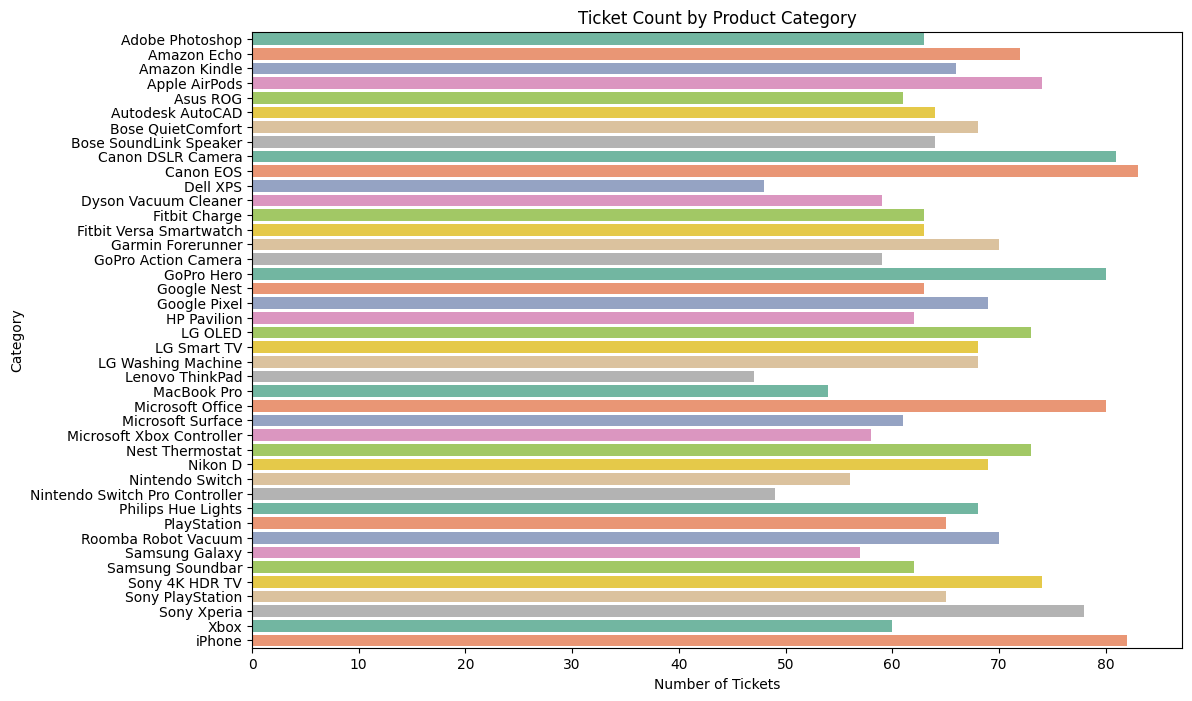

In [65]:
# understanding ticket count as per product category 
plt.figure(figsize=(12,8))
ticket_counts = company_base_data['Product Purchased'].value_counts()
sns.barplot(x=ticket_counts.values, y=ticket_counts.index, palette='Set2')
plt.title('Ticket Count by Product Category')
plt.xlabel('Number of Tickets')
plt.ylabel('Category')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_9844\3781059373.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_avg = company_base_data.groupby('Product Purchased')['Customer Satisfaction Rating'].mean().sort_values(ascending=False)
C:\Users\User\AppData\Local\Temp\ipykernel_9844\3781059373.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


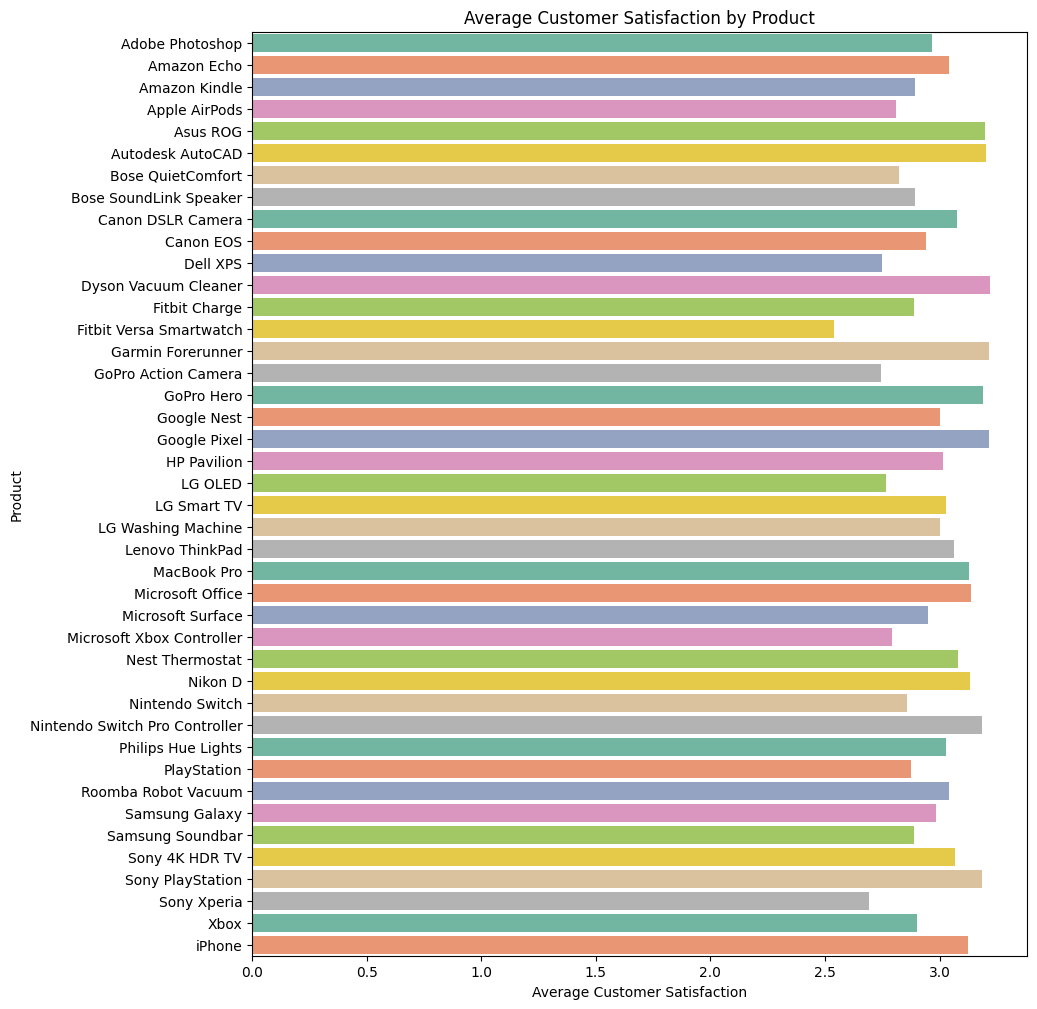

In [66]:

product_avg = company_base_data.groupby('Product Purchased')['Customer Satisfaction Rating'].mean().sort_values(ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(10,12))
sns.barplot(
    x=product_avg.values,
    y=product_avg.index,
    palette='Set2'
)
plt.xlabel('Average Customer Satisfaction')
plt.ylabel('Product')
plt.title('Average Customer Satisfaction by Product')
plt.show()


Product vs Ticket Count vs Customer Satisfaction

- High ticket count and Low Satisfaction(Bad): Fibit Versa Smarwatch, Sony Xperia, Sony Xperia, LG OLED, Bose QuietComfort
- Low Ticket count and High Satisfaction (Good): Nintendo Switch Pro Controller, MacBook Pro, Lenovo ThinkPad, Dyson Vacuum Cleaner, Asus ROG
- Product that have noticable ticket count and low satisfaction rate needs immediate attention and improvement in service

- There are many other examples having high ticket count and high Satisfaction or viceversa
- Ticket count and satisfaction do not have any direct relation they are separte metrix

In [67]:
# export data for dashboard bulding
company_base_data.to_csv("cleaned_customer_satisafaction_data", index=False )